# TF-IDF Scripts

### Import Libraries

In [332]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Custom Functions and File Imports

In [333]:
stemming = PorterStemmer()
stops = set(stopwords.words("english")) 

def removeStopWords(row):
    stemmed = row['stemmed']
    cleaned = [w for w in stemmed if not w in stops]
    cleaned = listToString(cleaned)
    return cleaned

def tokenize(row):
    message = row['message'].lower()
    tokens = word_tokenize(message)
    tok_words = [w for w in tokens if w.isalpha()]
    return tok_words
    
def stem(row):
    tokens = row['tokenized']
    stemmed = [stemming.stem(word) for word in tokens]
    return stemmed

def listToString(lst):
    text = ' '.join(lst)
    return text

In [334]:
os.chdir("D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\Batch 004") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)    

aless_enri.csv
faye_posadas.csv
kate_ermitano.csv
['aless_enri.csv', 'faye_posadas.csv', 'kate_ermitano.csv']


In [335]:
coder1 = pd.read_csv(files[0])
coder1.fillna(0)
coder2 = pd.read_csv(files[1])
coder2.fillna(0)
coder3 = pd.read_excel('usanews0full_3.xlsx')
coder3.fillna(0)

,Unnamed: 0,message,author,time_text,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,9000,👀YUP ! FACTS! PROOF! EVIDENCE! TRUTH! IS THE L...,username@ISRKEWKELW,1900-01-02 02:15:00,0.0,0.0,0.0,0.0,0.0,0.0
1,9001,"Pray USA, 🙏🙏🙏❤️❤️❤️",username@BnnBe eeBn,1900-01-02 02:15:00,0.0,0.0,0.0,0.0,0.0,0.0
2,9002,TRUMP 2020❤️❤️❤️❤️RED WAVE INCOMING,username@iizzilln i,1900-01-02 02:15:00,0.0,0.0,0.0,0.0,0.0,0.0
3,9003,All you people crying about covid dont even kn...,username@JxeoonFio,1900-01-02 02:16:00,0.0,1.0,0.0,0.0,1.0,1.0
4,9004,GERMANY LOVES TRUMP! WE NEED SOMEONE LIKE HIM!,username@rraorroaag,1900-01-02 02:16:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2995,11995,Coma-la Harris is Evil,username@oR ss oBBs,01:03:36,1.0,0.0,0.0,1.0,0.0,0.0
2996,11996,:awesome: :awesome: :awesome:,username@riiñrJoroo,01:03:36,0.0,0.0,0.0,0.0,0.0,0.0
2997,11997,BIDEN WILL DEFUND THE POLICE AND RADICAL LEFT ...,username@dsenesea t,01:03:36,0.0,0.0,0.0,1.0,0.0,0.0
2998,11998,":thanksdoc::thanksdoc::thanksdoc:THANK YOU, ME...",username@NSaimmmoaN,01:03:36,0.0,0.0,0.0,0.0,0.0,0.0


### Combine Documents Per Label

In [336]:
dHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Direct Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Direct Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Direct Harassment'] == 1.0]

dHarassment = pd.concat([temp0, temp1, temp2])
dHarassment.drop(dHarassment.columns.difference(['Unnamed: 0', 'message','Direct Harassment']), 1, inplace=True)

dHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
dHarassment
#duplicateRowsDF = dHarassment[dHarassment.duplicated()]
#duplicateRowsDF

,Unnamed: 0,message,Direct Harassment
48,9048,Biden is a corpse,1.0
53,9053,BEIJING BIDEN FOR PRISON!,1.0
62,9062,MEDIA MAFIA 4 BIDEN,1.0
81,9081,Trump is the best thing that could happen to g...,1.0
87,9087,Biden sucks,1.0
...,...,...,...
2692,11692,the so called news reporters are not real prof...,1.0
2767,11767,LADY GAGA IS REALLY A MALE,1.0
2843,11843,Where is Hunter? Why isn’t he helping Sleepy?,1.0
2895,11895,SANTA'S COMING TO TOWN YOU FILTHY SONE A BEEATCH,1.0


In [337]:
hSpeech = pd.DataFrame()
temp0 = coder1.loc[coder1['Hate Speech'] == 1.0]
temp1 = coder2.loc[coder2['Hate Speech'] == 1.0]
temp2 = coder3.loc[coder3['Hate Speech'] == 1.0]

hSpeech = pd.concat([temp0, temp1, temp2])
hSpeech.drop(hSpeech.columns.difference(['Unnamed: 0', 'message','Hate Speech']), 1, inplace=True)

hSpeech.drop_duplicates(subset ="message", keep = False, inplace = True)
hSpeech

,Unnamed: 0,message,Hate Speech
33,9033,CHINA BUYDEN,1.0
53,9053,BEIJING BIDEN FOR PRISON!,1.0
127,9127,please usa vote trump anti china,1.0
147,9147,🧱******BIDEN WILL RISE*******🧱 ***************...,1.0
163,9163,people who vote for Biden are simply uneducate...,1.0
...,...,...,...
2685,11685,"DEMS ONLY FAKE ""CARING"" TO BAIT PEOPLE & USE T...",1.0
2780,11780,🧂BIDEN SUPPORTERS ONLY WANT FREE SHIT🧂,1.0
2831,11831,PA will GO TRUMP/GOP. Our Dem GOV is a moron.,1.0
2916,11916,DEMOCRATS HATE AMERICA,1.0


In [338]:
sHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Sexual Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Sexual Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Sexual Harassment'] == 1.0]

sHarassment = pd.concat([temp0, temp1, temp2])
sHarassment.drop(sHarassment.columns.difference(['Unnamed: 0', 'message','Sexual Harassment']), 1, inplace=True)

sHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
sHarassment

,Unnamed: 0,message,Sexual Harassment
24,9024,Lady GaGa is Ugly GaGa another weak minded per...,1.0
126,9126,THE SPIRIT IS STRONG WITH THE GREY HAIR.,1.0
552,9552,HARRIS needs her broom stick,1.0
943,9943,T-REX MOUTH KAMALA,1.0
1086,10086,Keep America Free!!,1.0
1260,10260,GRAB PENCE BY THE P**** !!! 💥💥,1.0
1664,10664,🦶HUNTERS FOOTJOBS MATTER 🍌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌...,1.0
2171,11171,🦶HUNTERS FOOTJOBS MATTER 🍌,1.0


In [339]:
trolling = pd.DataFrame()
temp0 = coder1.loc[coder1['Trolling'] == 1.0]
temp1 = coder2.loc[coder2['Trolling'] == 1.0]
temp2 = coder3.loc[coder3['Trolling'] == 1.0]

trolling = pd.concat([temp0, temp1, temp2])
trolling.drop(trolling.columns.difference(['Unnamed: 0', 'message','Trolling']), 1, inplace=True)

trolling.drop_duplicates(subset ="message", keep = False, inplace = True)
trolling

,Unnamed: 0,message,Trolling
45,9045,ABC = FAKE NEWS,1.0
153,9153,TAX HIKERS FOR BIDEN,1.0
182,9182,Kamala just admitted she is a communist. now t...,1.0
227,9227,"BIDEN IS MARXIST, TRUMP A MAN OF PEACE",1.0
384,9384,😠BIDEN 💰LAUNDERING CORRUPTION👹,1.0
...,...,...,...
2735,11735,CHINA JOE FOR FIRING SQUAD 2020!!,1.0
2789,11789,Biden...Lock him down,1.0
2841,11841,USA you are the last stand against communism &...,1.0
2873,11873,CHINESE BOTS FOR BIDEN,1.0


In [340]:
others = pd.DataFrame()
temp0 = coder1.loc[coder1['Others'] == 1.0]
temp1 = coder2.loc[coder2['Others'] == 1.0]
temp2 = coder3.loc[coder3['Others'] == 1.0]

others = pd.concat([temp0, temp1, temp2])
others.drop(others.columns.difference(['Unnamed: 0', 'message','Others']), 1, inplace=True)

others.drop_duplicates(subset ="message", keep = False, inplace = True)
others

,Unnamed: 0,message,Others
483,9483,ARREST BIDENS,1.0
524,9524,Love Mike Dem's go away. Biden should be in ja...,1.0
1044,10044,lol LOCK HER UP,1.0
1114,10114,starting go fund me page to send all media rep...,1.0
1175,10175,Deport Kamala!!!!!,1.0
1260,10260,GRAB PENCE BY THE P**** !!! 💥💥,1.0
1425,10425,it's going to be great television..Trump is go...,1.0
1549,10549,LOCK UP WHITMER,1.0
1791,10791,FRACK BIDEN,1.0
2000,11000,BEIJING BIDEN FOR PRISON 2020 TO LIFE!,1.0


In [341]:
toxic = pd.DataFrame()
temp0 = coder1.loc[coder1['Toxic'] == 1.0]
temp1 = coder2.loc[coder2['Toxic'] == 1.0]
temp2 = coder3.loc[coder3['Toxic'] == 1.0]

toxic = pd.concat([temp0, temp1, temp2])
toxic.drop(toxic.columns.difference(['Unnamed: 0', 'message','Toxic']), 1, inplace=True)

toxic.drop_duplicates(subset ="message", keep = False, inplace = True)
toxic

,Unnamed: 0,message,Toxic
17,9017,Biden to JAIL,1.0
18,9018,Biden and Harris for prison,1.0
107,9107,OBAMA FOR PRISON,1.0
115,9115,JOHN PETERS IS USELESS,1.0
131,9131,MSM SUCKS,1.0
...,...,...,...
2940,11940,"No MO SLO, NO MOJO Joe-KE LIEDEM",1.0
2944,11944,KAMALA IS DANGEROUS,1.0
2952,11952,😠BIDEN CORRUPTION 😠,1.0
2993,11993,NO MORE JOE..PERIOD DEMENTIA JOE GO GO GO!!! A...,1.0


## NLP Text Processing Stuff


In [342]:
dHarassment['tokenized'] = dHarassment.apply(tokenize, axis=1)
dHarassment['stemmed'] = dHarassment.apply(stem, axis=1)
dHarassment['stop_words'] = dHarassment.apply(removeStopWords, axis=1)
dHarassment

,Unnamed: 0,message,Direct Harassment,tokenized,stemmed,stop_words
48,9048,Biden is a corpse,1.0,"[biden, is, a, corpse]","[biden, is, a, corps]",biden corps
53,9053,BEIJING BIDEN FOR PRISON!,1.0,"[beijing, biden, for, prison]","[beij, biden, for, prison]",beij biden prison
62,9062,MEDIA MAFIA 4 BIDEN,1.0,"[media, mafia, biden]","[media, mafia, biden]",media mafia biden
81,9081,Trump is the best thing that could happen to g...,1.0,"[trump, is, the, best, thing, that, could, hap...","[trump, is, the, best, thing, that, could, hap...",trump best thing could happen german carbaret
87,9087,Biden sucks,1.0,"[biden, sucks]","[biden, suck]",biden suck
...,...,...,...,...,...,...
2692,11692,the so called news reporters are not real prof...,1.0,"[the, so, called, news, reporters, are, not, r...","[the, so, call, news, report, are, not, real, ...",call news report real profession traitor deser...
2767,11767,LADY GAGA IS REALLY A MALE,1.0,"[lady, gaga, is, really, a, male]","[ladi, gaga, is, realli, a, male]",ladi gaga realli male
2843,11843,Where is Hunter? Why isn’t he helping Sleepy?,1.0,"[where, is, hunter, why, isn, t, he, helping, ...","[where, is, hunter, whi, isn, t, he, help, sle...",hunter whi help sleepi
2895,11895,SANTA'S COMING TO TOWN YOU FILTHY SONE A BEEATCH,1.0,"[santa, coming, to, town, you, filthy, sone, a...","[santa, come, to, town, you, filthi, sone, a, ...",santa come town filthi sone beeatch


In [343]:
hSpeech['tokenized'] = hSpeech.apply(tokenize, axis=1)
hSpeech['stemmed'] = hSpeech.apply(stem, axis=1)
hSpeech['stop_words'] = hSpeech.apply(removeStopWords, axis=1)
hSpeech

,Unnamed: 0,message,Hate Speech,tokenized,stemmed,stop_words
33,9033,CHINA BUYDEN,1.0,"[china, buyden]","[china, buyden]",china buyden
53,9053,BEIJING BIDEN FOR PRISON!,1.0,"[beijing, biden, for, prison]","[beij, biden, for, prison]",beij biden prison
127,9127,please usa vote trump anti china,1.0,"[please, usa, vote, trump, anti, china]","[pleas, usa, vote, trump, anti, china]",pleas usa vote trump anti china
147,9147,🧱******BIDEN WILL RISE*******🧱 ***************...,1.0,"[biden, will, rise, your, taxes]","[biden, will, rise, your, tax]",biden rise tax
163,9163,people who vote for Biden are simply uneducate...,1.0,"[people, who, vote, for, biden, are, simply, u...","[peopl, who, vote, for, biden, are, simpli, un...",peopl vote biden simpli uneduc trump
...,...,...,...,...,...,...
2685,11685,"DEMS ONLY FAKE ""CARING"" TO BAIT PEOPLE & USE T...",1.0,"[dems, only, fake, caring, to, bait, people, u...","[dem, onli, fake, care, to, bait, peopl, use, ...",dem onli fake care bait peopl use get stay off...
2780,11780,🧂BIDEN SUPPORTERS ONLY WANT FREE SHIT🧂,1.0,"[supporters, only, want, free]","[support, onli, want, free]",support onli want free
2831,11831,PA will GO TRUMP/GOP. Our Dem GOV is a moron.,1.0,"[pa, will, go, our, dem, gov, is, a, moron]","[pa, will, go, our, dem, gov, is, a, moron]",pa go dem gov moron
2916,11916,DEMOCRATS HATE AMERICA,1.0,"[democrats, hate, america]","[democrat, hate, america]",democrat hate america


In [344]:
sHarassment['tokenized'] = sHarassment.apply(tokenize, axis=1)
sHarassment['stemmed'] = sHarassment.apply(stem, axis=1)
sHarassment['stop_words'] = sHarassment.apply(removeStopWords, axis=1)
sHarassment

,Unnamed: 0,message,Sexual Harassment,tokenized,stemmed,stop_words
24,9024,Lady GaGa is Ugly GaGa another weak minded per...,1.0,"[lady, gaga, is, ugly, gaga, another, weak, mi...","[ladi, gaga, is, ugli, gaga, anoth, weak, mind...",ladi gaga ugli gaga anoth weak mind person thi...
126,9126,THE SPIRIT IS STRONG WITH THE GREY HAIR.,1.0,"[the, spirit, is, strong, with, the, grey, hair]","[the, spirit, is, strong, with, the, grey, hair]",spirit strong grey hair
552,9552,HARRIS needs her broom stick,1.0,"[harris, needs, her, broom, stick]","[harri, need, her, broom, stick]",harri need broom stick
943,9943,T-REX MOUTH KAMALA,1.0,"[mouth, kamala]","[mouth, kamala]",mouth kamala
1086,10086,Keep America Free!!,1.0,"[keep, america, free]","[keep, america, free]",keep america free
1260,10260,GRAB PENCE BY THE P**** !!! 💥💥,1.0,"[grab, pence, by, the, p]","[grab, penc, by, the, p]",grab penc p
1664,10664,🦶HUNTERS FOOTJOBS MATTER 🍌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌...,1.0,"[footjobs, matter]","[footjob, matter]",footjob matter
2171,11171,🦶HUNTERS FOOTJOBS MATTER 🍌,1.0,"[footjobs, matter]","[footjob, matter]",footjob matter


In [345]:
trolling['tokenized'] = trolling.apply(tokenize, axis=1)
trolling['stemmed'] = trolling.apply(stem, axis=1)
trolling['stop_words'] = trolling.apply(removeStopWords, axis=1)
trolling

,Unnamed: 0,message,Trolling,tokenized,stemmed,stop_words
45,9045,ABC = FAKE NEWS,1.0,"[abc, fake, news]","[abc, fake, news]",abc fake news
153,9153,TAX HIKERS FOR BIDEN,1.0,"[tax, hikers, for, biden]","[tax, hiker, for, biden]",tax hiker biden
182,9182,Kamala just admitted she is a communist. now t...,1.0,"[kamala, just, admitted, she, is, a, communist...","[kamala, just, admit, she, is, a, communist, n...",kamala admit communist even tri hide ani
227,9227,"BIDEN IS MARXIST, TRUMP A MAN OF PEACE",1.0,"[biden, is, marxist, trump, a, man, of, peace]","[biden, is, marxist, trump, a, man, of, peac]",biden marxist trump man peac
384,9384,😠BIDEN 💰LAUNDERING CORRUPTION👹,1.0,[],[],
...,...,...,...,...,...,...
2735,11735,CHINA JOE FOR FIRING SQUAD 2020!!,1.0,"[china, joe, for, firing, squad]","[china, joe, for, fire, squad]",china joe fire squad
2789,11789,Biden...Lock him down,1.0,"[biden, lock, him, down]","[biden, lock, him, down]",biden lock
2841,11841,USA you are the last stand against communism &...,1.0,"[usa, you, are, the, last, stand, against, com...","[usa, you, are, the, last, stand, against, com...",usa last stand commun usa world democraci smal...
2873,11873,CHINESE BOTS FOR BIDEN,1.0,"[chinese, bots, for, biden]","[chines, bot, for, biden]",chines bot biden


In [346]:
others['tokenized'] = others.apply(tokenize, axis=1)
others['stemmed'] = others.apply(stem, axis=1)
others['stop_words'] = others.apply(removeStopWords, axis=1)
others

,Unnamed: 0,message,Others,tokenized,stemmed,stop_words
483,9483,ARREST BIDENS,1.0,"[arrest, bidens]","[arrest, biden]",arrest biden
524,9524,Love Mike Dem's go away. Biden should be in ja...,1.0,"[love, mike, dem, go, away, biden, should, be,...","[love, mike, dem, go, away, biden, should, be,...",love mike dem go away biden jail go watch fake...
1044,10044,lol LOCK HER UP,1.0,"[lol, lock, her, up]","[lol, lock, her, up]",lol lock
1114,10114,starting go fund me page to send all media rep...,1.0,"[starting, go, fund, me, page, to, send, all, ...","[start, go, fund, me, page, to, send, all, med...",start go fund page send media report get mo le...
1175,10175,Deport Kamala!!!!!,1.0,"[deport, kamala]","[deport, kamala]",deport kamala
1260,10260,GRAB PENCE BY THE P**** !!! 💥💥,1.0,"[grab, pence, by, the, p]","[grab, penc, by, the, p]",grab penc p
1425,10425,it's going to be great television..Trump is go...,1.0,"[it, going, to, be, great, television, trump, ...","[it, go, to, be, great, televis, trump, is, go...",go great televis trump go crook media poo face...
1549,10549,LOCK UP WHITMER,1.0,"[lock, up, whitmer]","[lock, up, whitmer]",lock whitmer
1791,10791,FRACK BIDEN,1.0,"[frack, biden]","[frack, biden]",frack biden
2000,11000,BEIJING BIDEN FOR PRISON 2020 TO LIFE!,1.0,"[beijing, biden, for, prison, to, life]","[beij, biden, for, prison, to, life]",beij biden prison life


In [347]:
toxic['tokenized'] = toxic.apply(tokenize, axis=1)
toxic['stemmed'] = toxic.apply(stem, axis=1)
toxic['stop_words'] = toxic.apply(removeStopWords, axis=1)
toxic

,Unnamed: 0,message,Toxic,tokenized,stemmed,stop_words
17,9017,Biden to JAIL,1.0,"[biden, to, jail]","[biden, to, jail]",biden jail
18,9018,Biden and Harris for prison,1.0,"[biden, and, harris, for, prison]","[biden, and, harri, for, prison]",biden harri prison
107,9107,OBAMA FOR PRISON,1.0,"[obama, for, prison]","[obama, for, prison]",obama prison
115,9115,JOHN PETERS IS USELESS,1.0,"[john, peters, is, useless]","[john, peter, is, useless]",john peter useless
131,9131,MSM SUCKS,1.0,"[msm, sucks]","[msm, suck]",msm suck
...,...,...,...,...,...,...
2940,11940,"No MO SLO, NO MOJO Joe-KE LIEDEM",1.0,"[no, mo, slo, no, mojo, liedem]","[no, mo, slo, no, mojo, liedem]",mo slo mojo liedem
2944,11944,KAMALA IS DANGEROUS,1.0,"[kamala, is, dangerous]","[kamala, is, danger]",kamala danger
2952,11952,😠BIDEN CORRUPTION 😠,1.0,[corruption],[corrupt],corrupt
2993,11993,NO MORE JOE..PERIOD DEMENTIA JOE GO GO GO!!! A...,1.0,"[no, more, joe, period, dementia, joe, go, go,...","[no, more, joe, period, dementia, joe, go, go,...",joe period dementia joe go go go kamelto hell


### TFIDF Stuff

#### TFIDF On Direct Harassment

In [348]:
#no text processing
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(dHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [349]:
#stop words removed
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(dHar.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

In [350]:
df.head()

,2020,abortistas,about,acting,adrenochrome,afeminados,all,allegiance,almost,american,...,wrong,wyle,yall,you,your,yrs,zombie,𝗕𝗔𝗡𝗗𝗜𝗗𝗢,𝗕𝗥𝗨j𝗔,𝗦𝐊𝗔𝗠𝗔𝗟𝗔
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
df1.head()

,abortista,act,adrenochrom,afeminado,allegi,almost,american,anthem,anti,anywher,...,win,world,wrong,wyle,yall,yr,zombi,𝗕𝗔𝗡𝗗𝗜𝗗𝗢,𝗕𝗥𝗨j𝗔,𝗦𝐊𝗔𝗠𝗔𝗟𝗔
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

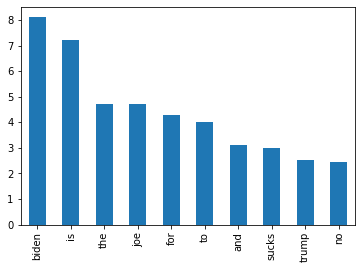

In [352]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

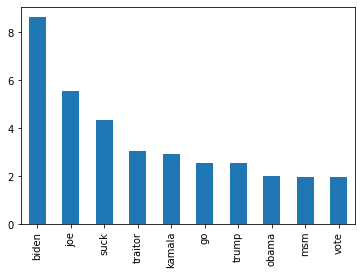

In [353]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Hate Speech

In [354]:
vectorizer = TfidfVectorizer()
hSpeech = vectorizer.fit_transform(hSpeech['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(hSpeech.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [355]:
#stop words removed
vectorizer = TfidfVectorizer()
hSpeech = vectorizer.fit_transform(hSpeech['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(hSpeech.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

IndexError: Index dimension must be <= 2

In [ ]:
vals = vals[0:10]
vals.plot.bar()

In [ ]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Sexual Harassment

In [ ]:
vectorizer = TfidfVectorizer()
sHarassment = vectorizer.fit_transform(sHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(sHarassment.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [ ]:
vals = vals[0:10]
vals.plot.bar()

#### TFIDF on Trolling

In [ ]:
vectorizer = TfidfVectorizer()
trolling = vectorizer.fit_transform(trolling['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(trolling.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [ ]:
vals = vals[0:10]
vals.plot.bar()

#### TFIDF on Others

In [ ]:
vectorizer = TfidfVectorizer()
others = vectorizer.fit_transform(others['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(others.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [ ]:
vals = vals[0:10]
vals.plot.bar()

#### TFIDF on Toxic

In [ ]:
vectorizer = TfidfVectorizer()
toxic = vectorizer.fit_transform(toxic['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(toxic.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [ ]:
vals = vals[0:10]
vals.plot.bar()

### TFIDF Scores with Stopwords Removed